In [1]:
from get_datasets.Get_Datasets import get_data_array, get_datasets
from src.Train_Model import train_model
from src.Create_Model import create_model
from src.Evolutionary_Algorithm import create_next_population, create_first_population, select_best_2_model

import re
import os
import random
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('float16')
mixed_precision.set_global_policy(policy)

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [2]:
x_train, y_train, x_val, y_val, x_test, y_test = get_data_array(train_dir='chest_xray_new/train',
                                                                test_dir='chest_xray_new/test')

  0%|          | 0/3883 [00:00<?, ?it/s]

  0%|          | 0/2698 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

In [3]:
train_ds_rand, val_ds, test_ds = get_datasets(x_train, y_train, x_test, y_test, x_val, y_val)

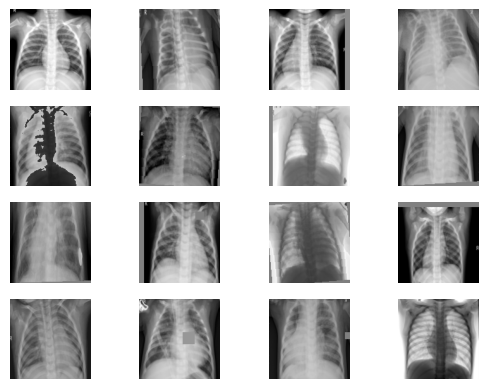

In [4]:
sample_images, _ = next(iter(train_ds_rand))
plt.figure()
for i, image in enumerate(sample_images[:16]):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image.numpy().astype("int"))
    plt.axis("off")

In [5]:
model_array = np.random.randint(0, 2, (9, 18))

In [6]:
test_model = create_model(model_array, num_classes=2, input_shape=(128, 128, 3))
test_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 16)   208         ['rescaling[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 16)  64          ['conv2d[0][0]']             

In [7]:
test_model, history = train_model(train_ds_rand, val_ds, test_model)

Epoch 1/20
371/371 [==============================] - 182s 382ms/step - loss: nan - accuracy: 0.5898 - val_loss: nan - val_accuracy: 0.6250
Epoch 2/20
171/371 [============>.................] - ETA: 1:10 - loss: nan - accuracy: 0.5879Do not have enough memory.
